# k-Nearest Neighbors

## Classification

### Dataset Load - Forge Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# forge dataset 로드
data = np.load('./datas/forge_dataset.npy', allow_pickle=True)
X = data[:,:-1]
y = data[:,-1]

In [5]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (26, 2)
shape of y (26,)
y: [1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0.]


### Simple EDA

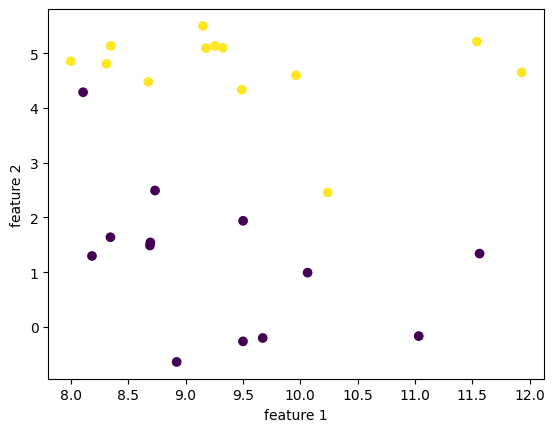

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

### Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# 훈련/검증 데이터셋으로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 0)

In [9]:
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Learning

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# KNN 모델 학습
clf = KNeighborsClassifier(n_neighbors = 3)

In [12]:
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Inference & Evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
# 훈련 데이터셋으로 모델 평가
y_train_hat = clf.predict(X_train_scaled)
print('ground truth of y_train:', y_train)
print('prediction result of y_train:', y_train_hat)

# 훈련 데이터셋의 정확도
y_train_accuracy = accuracy_score(y_train, y_train_hat)
print('train_accuracy:', y_train_accuracy)

ground truth of y_train: [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
prediction result of y_train: [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
train_accuracy: 0.9473684210526315


In [15]:
# 검증 데이터셋으로 모델 평가
y_val_hat = clf.predict(X_val_scaled)
print('ground truth of y_val:', y_val)
print('prediction result of y_val:', y_val_hat)

# 검증 데이터셋의 정확도
y_val_accuracy = accuracy_score(y_val, y_val_hat)
print('val_accuracy:', y_val_accuracy)

ground truth of y_val: [1. 0. 1. 0. 1. 1. 0.]
prediction result of y_val: [1. 0. 1. 0. 1. 0. 0.]
val_accuracy: 0.8571428571428571


### Hyperparameter search (number of neighbors)

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
# 유방암 데이터셋 로드
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

In [18]:
# 훈련/검증 데이터셋으로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [19]:
# k 값에 따른 정확도 비교
train_accuracy_list = []
val_accuracy_list = []

In [20]:
k_search_list = range(1, 30, 2)
list(k_search_list)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [21]:
for k in k_search_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_hat)

    y_val_hat = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_hat)

    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

In [22]:
# 판다스 데이터프레임으로 정리
result_df = pd.DataFrame({
        'k': k_search_list,
    'train accuracy': train_accuracy_list,
    'val accuracy': val_accuracy_list
})

In [23]:
display(result_df)  ## k 가 작을수록 overfitting 됨

,k,train accuracy,val accuracy
0,1,1.000000,0.916084
1,3,0.957746,0.923077
2,5,0.941315,0.937063
3,7,0.938967,0.944056
4,9,0.936620,0.958042
5,11,0.936620,0.958042
6,13,0.934272,0.958042
7,15,0.936620,0.958042
8,17,0.929577,0.958042
9,19,0.929577,0.958042


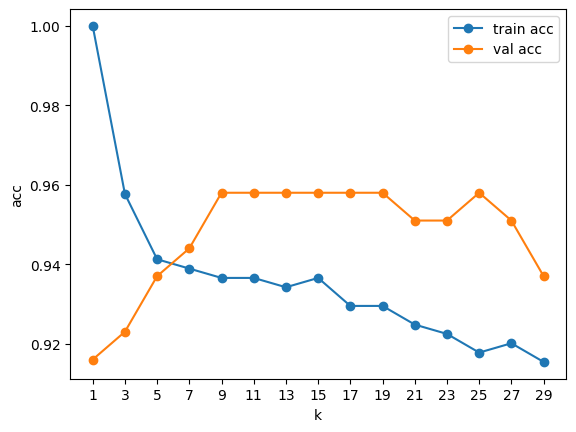

In [24]:
# k값에 따른 성능 변화 시각화
plt.plot(np.arange(len(k_search_list)), train_accuracy_list, label='train acc', marker='o')
plt.plot(np.arange(len(k_search_list)), val_accuracy_list, label='val acc', marker='o')
plt.xlabel('k')
plt.ylabel('acc')
plt.xticks(np.arange(len(k_search_list)), k_search_list)
plt.legend()
plt.show()

### Hyperparameter Search (Power parameter for Minkowski distance)

In [25]:
# p 값에 따른 정확도 비교
train_accuracy_list = []
val_accuracy_list = []

In [26]:
p_search_list = range(1,6)

In [27]:
for p in p_search_list:
    clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=p)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_hat)

    y_val_hat = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_hat)

    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

In [28]:
# 판다스 데이터프레임으로 정리
result_df = pd.DataFrame({
        'p': p_search_list,
    'train accuracy': train_accuracy_list,
    'val accuracy': val_accuracy_list
})

In [29]:
display(result_df)

,p,train accuracy,val accuracy
0,1,0.957746,0.958042
1,2,0.941315,0.937063
2,3,0.941315,0.930070
3,4,0.938967,0.930070
4,5,0.938967,0.930070


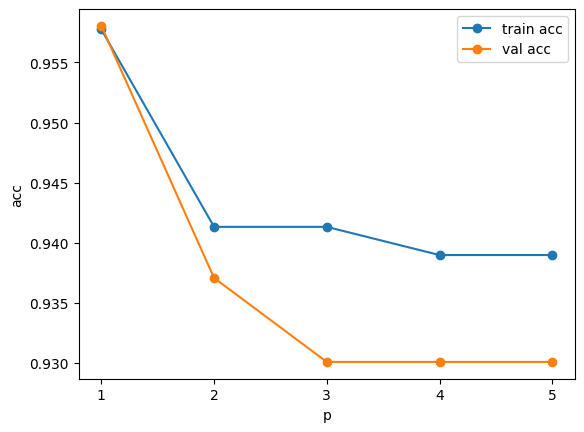

In [30]:
# p값에 따른 성능 변화 시각화
plt.plot(np.arange(len(p_search_list)), train_accuracy_list, label='train acc', marker='o')
plt.plot(np.arange(len(p_search_list)), val_accuracy_list, label='val acc', marker='o')
plt.xlabel('p')
plt.ylabel('acc')
plt.xticks(np.arange(len(p_search_list)), p_search_list)
plt.legend()
plt.show()

## Regression

### Dataset Load - Wave Dataset

In [31]:
data = np.load('./datas/wave_dataset.npy', allow_pickle=True)
X = data[:,:-1]
y = data[:,-1]

In [32]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (40, 1)
shape of y (40,)
y: [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.47411033  1.53708251  0.86893293  1.87664889
  0.0945257  -1.41502356  0.25438895  0.09398858]


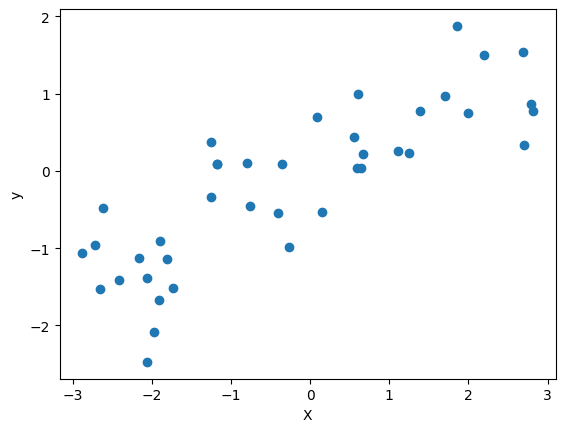

In [33]:
plt.plot(X, y, 'o')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Data Preprocessing

In [34]:
# 훈련/검증 데이터셋으로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [35]:
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Learning

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
# KNN 모델 학습
reg = KNeighborsRegressor(n_neighbors=3)

In [38]:
reg.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

### Inference & Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# 훈련 데이터셋으로 모델 평가
y_train_hat = reg.predict(X_train_scaled)
print('ground truth of y_train:', y_train)
print('prediction result of y_train:', y_train_hat)


ground truth of y_train: [-1.51369739 -2.47196233 -0.52734666 -1.67303415  1.53708251  1.49417157
 -0.47411033  0.33122576 -1.13455014  0.75418806 -2.08581717 -0.98618122
 -1.52730805  0.09756349 -1.12469096 -0.3409073   0.22956153  0.25438895
  0.03497884 -0.44822073]
prediction result of y_train: [-1.44042723 -1.89415682 -0.49284968 -1.63113382  1.12082662  1.26181405
 -1.04203645  1.12082662 -1.44042723  1.26181405 -2.07693788 -0.6539162
 -1.04203645 -0.23052151 -1.89415682 -0.5856804   0.17297644  0.17297644
 -0.07932629 -0.44561282]


In [41]:
# 훈련 데이터셋의 성능 평가
y_train_mae = mean_absolute_error(y_train, y_train_hat)
y_train_rmse = mean_squared_error(y_train, y_train_hat)**0.5
y_train_r2 = r2_score(y_train, y_train_hat)
print('train_MAE: %.4f'%y_train_mae)
print('train_RMSE: %.4f'%y_train_rmse)
print('train_R_square: %.4f'%y_train_r2)

train_MAE: 0.2985
train_RMSE: 0.3870
train_R_square: 0.8700


In [42]:
# 검증 데이터셋으로 모델 평가
y_val_hat = reg.predict(X_val_scaled)
print('ground truth of y_val:', y_val)
print('prediction result of y_val:', y_val_hat)

ground truth of y_val: [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133  0.69798591  1.87664889
 -1.41502356  0.77932073  0.09398858  0.03527881  0.86893293  0.08448544
  0.0945257   1.00032374]
prediction result of y_val: [-0.5856804  -0.07932629  0.82597372 -1.89415682 -1.04203645 -1.63113382
 -0.07932629  1.12082662 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282 -0.07932629  1.12082662 -0.23052151
 -0.23052151 -0.07932629]


In [43]:
# 검증 데이터셋의 성능 평가
y_val_mae = mean_absolute_error(y_val, y_val_hat)
y_val_rmse = mean_squared_error(y_val, y_val_hat)**0.5
y_val_r2 = r2_score(y_val, y_val_hat)
print('val_MAE: %.4f'%y_val_mae)
print('val_RMSE: %.4f'%y_val_rmse)
print('val_R_square: %.4f'%y_val_r2)

val_MAE: 0.4646
val_RMSE: 0.5807
val_R_square: 0.5559
